In [7]:
from NCGL import NCGL
import numpy as np
import matplotlib.pyplot as plt

The multiplicative noise:

$$d_t (A) = (1+ic_1) \nabla ^2 A + A - (1+ic_2)|A|^2A+\sigma  A (d_t\eta)$$ 

In [8]:
gl = NCGL(c1=0.0, c2=1.5, sigma_r=100.0,noiseArgs={"beta":2},msize=128)
#gl = NCGL(c1=0.0, c2=1.5, sigma_r=0.0,noiseArgs={"beta":2},msize=128)

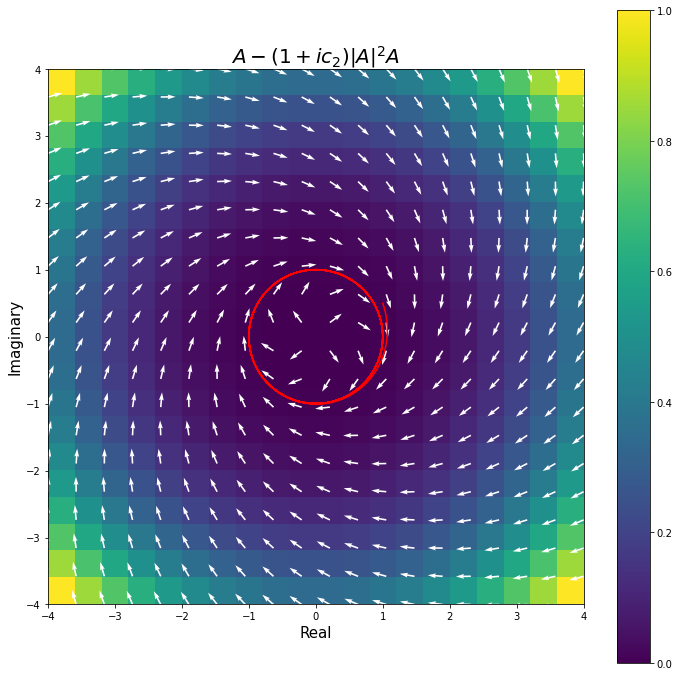

In [5]:
nVec = 20
fromTo = (-4.0,4.0)
a0 = 1+0.5j

it = gl.getChainedSingleReaction(a0=a0, dt = 0.01,nit = 3000)

x,y = np.meshgrid(np.linspace(*fromTo,nVec),np.linspace(*fromTo,nVec))
states = x+1j*y
reactionDer = gl.reaction(states,0.0)
mods = np.abs(reactionDer)
mods[mods<1e-10] = 1

plt.figure(figsize = (12,12))
plt.imshow(mods,origin='lower',extent=(*fromTo,*fromTo))
plt.quiver(x, y, np.real(reactionDer)/mods, np.imag(reactionDer)/mods,color='white')
plt.plot(np.real(it),np.imag(it),color='r')
plt.xlabel("Real",fontsize=15)
plt.ylabel("Imaginary",fontsize=15)
plt.title(r"$A - (1+ic_2)|A|^2A$",fontsize=20)

plt.colorbar()
plt.show()

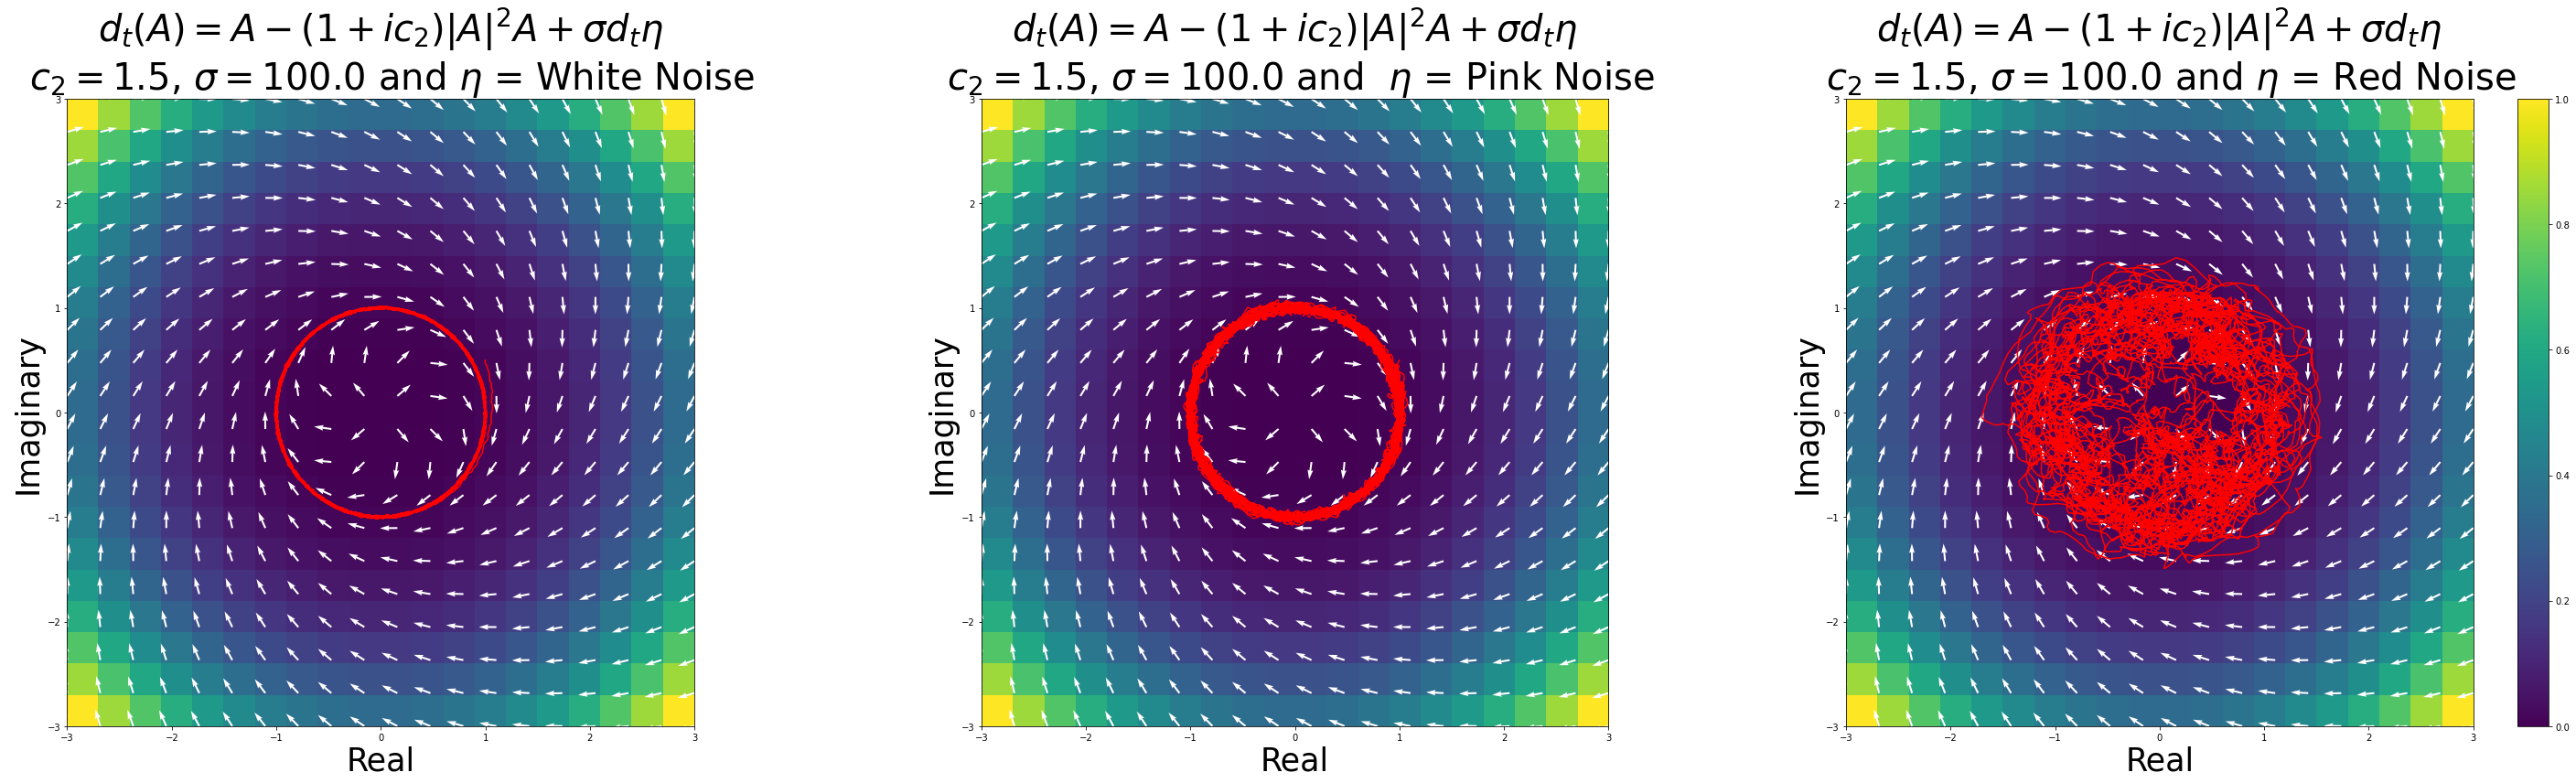

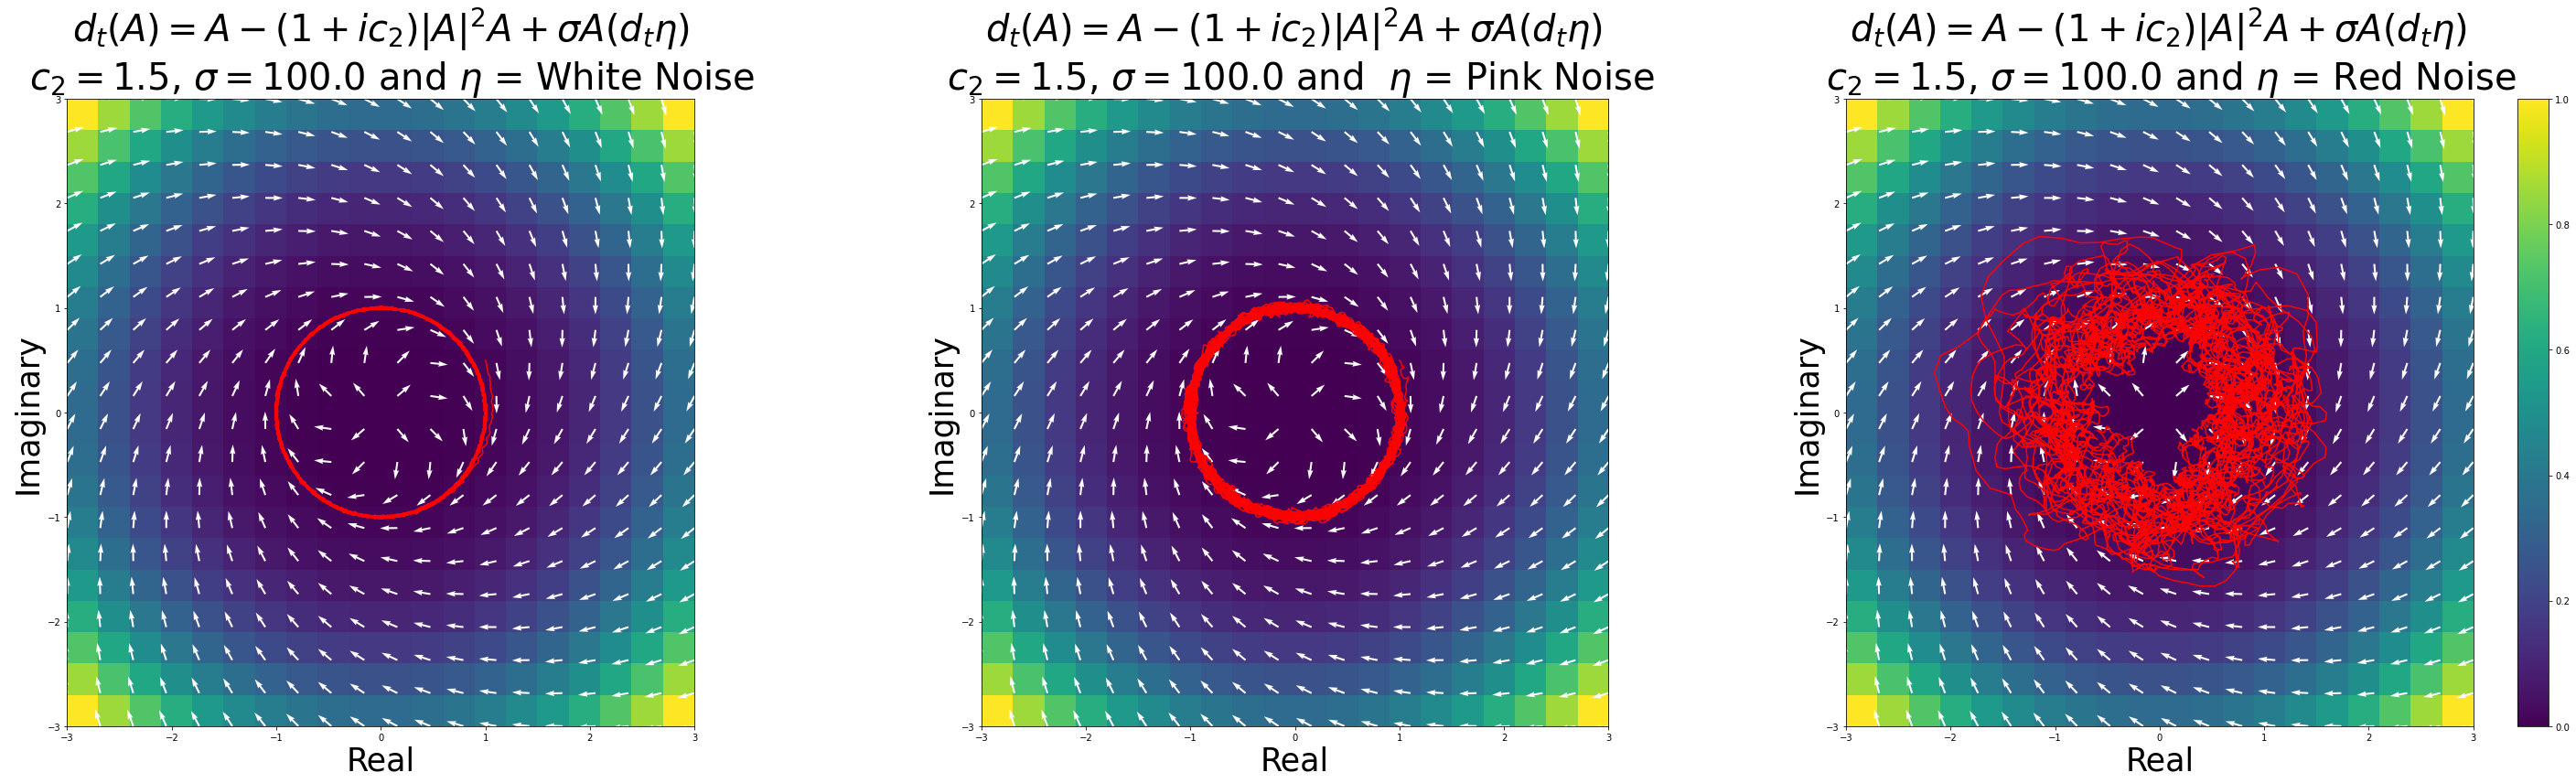

In [13]:
nVec = 20
fromTo = (-3.0,3.0)
a0 = 1+0.5j

x,y = np.meshgrid(np.linspace(*fromTo,nVec),np.linspace(*fromTo,nVec))
states = x+1j*y
reactionDer = gl.reaction(states,0.0)
mods = np.abs(reactionDer)
mods[mods<1e-10] = 1

###################################################
gl = NCGL(c1=0.0, c2=1.5, sigma_r=100.0,noiseArgs={"beta":2},msize=128,noiseType='additive')
plt.figure(figsize = (42,12))

plt.subplot(1,3,1)
it = gl.getNoisyChainedSingleReaction(a0=a0, dt = 0.01,beta= 0 ,nit = 10000)
plt.imshow(mods,origin='lower',extent=(*fromTo,*fromTo))
plt.quiver(x, y, np.real(reactionDer)/mods, np.imag(reactionDer)/mods,color='white')
plt.plot(np.real(it),np.imag(it),color='r')
plt.xlabel("Real",fontsize=35)
plt.ylabel("Imaginary",fontsize=35)
plt.title("$d_t (A) =A - (1+ic_2)|A|^2A+\sigma d_t\eta$\n  $c_2=1.5$, $\sigma=100.0$ and $\eta$ = White Noise",fontsize=40)


plt.subplot(1,3,2)
it = gl.getNoisyChainedSingleReaction(a0=a0, dt = 0.01,beta= 1 ,nit = 10000)
plt.imshow(mods,origin='lower',extent=(*fromTo,*fromTo))
plt.quiver(x, y, np.real(reactionDer)/mods, np.imag(reactionDer)/mods,color='white')
plt.plot(np.real(it),np.imag(it),color='r')
plt.xlabel("Real",fontsize=35)
plt.ylabel("Imaginary",fontsize=35)
plt.title("$d_t (A) =A - (1+ic_2)|A|^2A+\sigma d_t\eta$ \n $c_2=1.5$, $\sigma=100.0$ and  $\eta$ = Pink Noise",fontsize=40)

plt.subplot(1,3,3)
it = gl.getNoisyChainedSingleReaction(a0=a0, dt = 0.01,beta= 2,nit = 10000)
plt.imshow(mods,origin='lower',extent=(*fromTo,*fromTo))
plt.quiver(x, y, np.real(reactionDer)/mods, np.imag(reactionDer)/mods,color='white')
plt.plot(np.real(it),np.imag(it),color='r')
plt.xlabel("Real",fontsize=35)
plt.ylabel("Imaginary",fontsize=35)
plt.title("$d_t (A) = A - (1+ic_2)|A|^2A+\sigma d_t\eta$ \n  $c_2=1.5$, $\sigma=100.0$ and $\eta$ = Red Noise",fontsize=40)

plt.tight_layout()
plt.colorbar()

##########################################
gl = NCGL(c1=0.0, c2=1.5, sigma_r=100.0,noiseArgs={"beta":2},msize=128,noiseType='multiplicative')
plt.figure(figsize = (42,12))

plt.subplot(1,3,1)
it = gl.getNoisyChainedSingleReaction(a0=a0, dt = 0.01,beta= 0 ,nit = 10000)
plt.imshow(mods,origin='lower',extent=(*fromTo,*fromTo))
plt.quiver(x, y, np.real(reactionDer)/mods, np.imag(reactionDer)/mods,color='white')
plt.plot(np.real(it),np.imag(it),color='r')
plt.xlabel("Real",fontsize=35)
plt.ylabel("Imaginary",fontsize=35)
plt.title("$d_t (A) =A - (1+ic_2)|A|^2A+\sigma A (d_t\eta)$\n  $c_2=1.5$, $\sigma=100.0$ and $\eta$ = White Noise",fontsize=40)


plt.subplot(1,3,2)
it = gl.getNoisyChainedSingleReaction(a0=a0, dt = 0.01,beta= 1 ,nit = 10000)
plt.imshow(mods,origin='lower',extent=(*fromTo,*fromTo))
plt.quiver(x, y, np.real(reactionDer)/mods, np.imag(reactionDer)/mods,color='white')
plt.plot(np.real(it),np.imag(it),color='r')
plt.xlabel("Real",fontsize=35)
plt.ylabel("Imaginary",fontsize=35)
plt.title("$d_t (A) =A - (1+ic_2)|A|^2A+\sigma A (d_t\eta)$ \n $c_2=1.5$, $\sigma=100.0$ and  $\eta$ = Pink Noise",fontsize=40)

plt.subplot(1,3,3)
it = gl.getNoisyChainedSingleReaction(a0=a0, dt = 0.01,beta= 2,nit = 10000)
plt.imshow(mods,origin='lower',extent=(*fromTo,*fromTo))
plt.quiver(x, y, np.real(reactionDer)/mods, np.imag(reactionDer)/mods,color='white')
plt.plot(np.real(it),np.imag(it),color='r')
plt.xlabel("Real",fontsize=35)
plt.ylabel("Imaginary",fontsize=35)
plt.title("$d_t (A) = A - (1+ic_2)|A|^2A+\sigma  A (d_t\eta)$ \n  $c_2=1.5$, $\sigma=100.0$ and $\eta$ = Red Noise",fontsize=40)

plt.tight_layout()
plt.colorbar()

plt.show()

# Without Noise

Noise error -  0.019409542633142873
Noise error -  -0.0010364502810102927
Best decay constant: 1.911269871053464  Error:  0.0010364502810102927
Noise error -  0.013003321199505757
Noise error -  -0.0007921347041053295
Best decay constant: 1.9073661668101227  Error:  0.0007921347041053295


100%|██████████| 1500/1500 [00:17<00:00, 86.33it/s]


(1501, 128, 128)


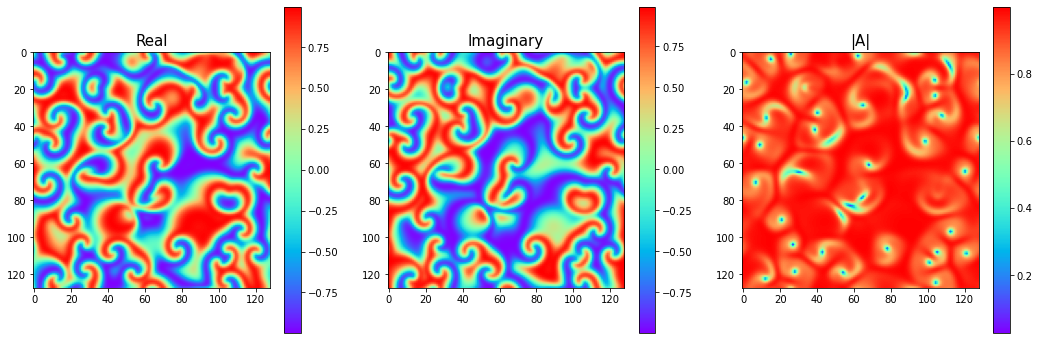

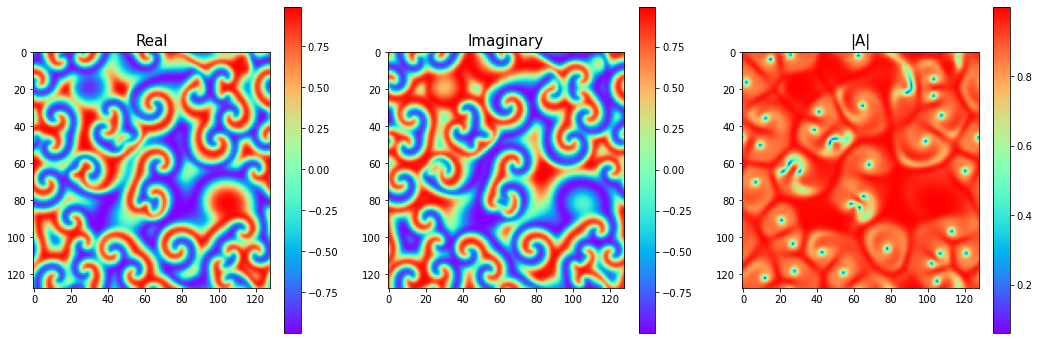

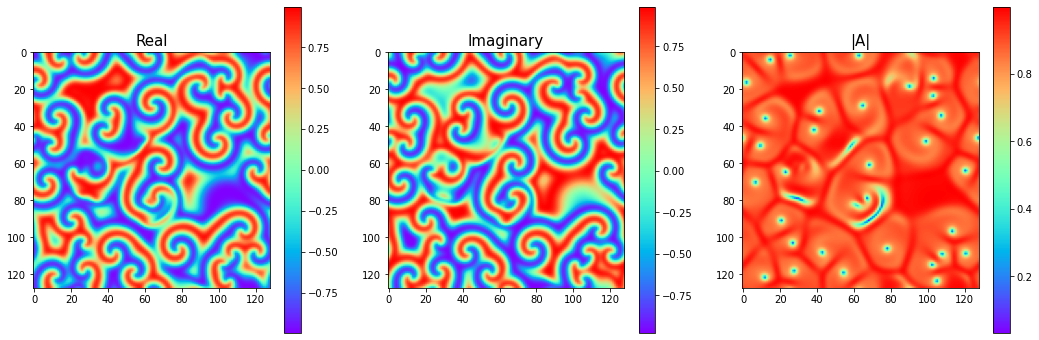

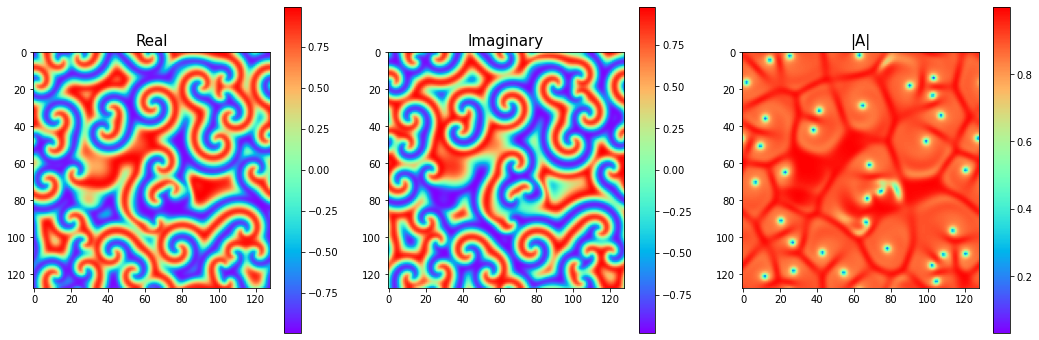

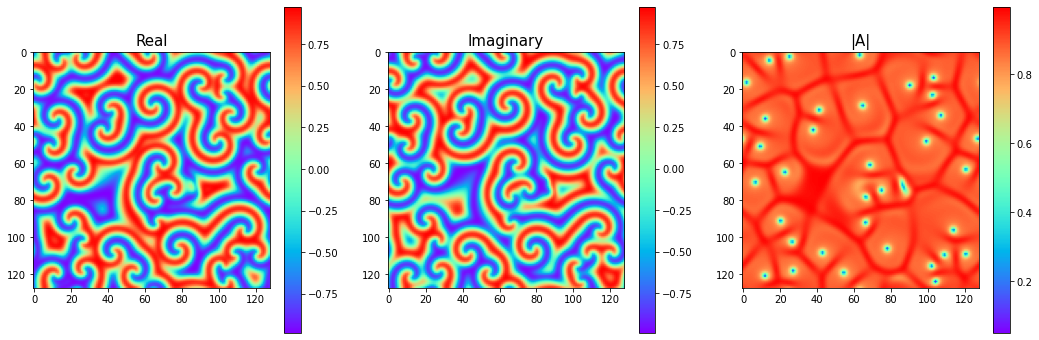

In [2]:
gl = NCGL(c1=0.0, c2=1.5, sigma_r=0.0,noiseArgs={"beta":2},msize=128)
data,times = gl.solveRKF45(dt=0.05,ntimes=1500,stepsave=np.arange(2500))
print(data.shape)

plotSnap = [500,700,900,1100,1300]

for i in plotSnap:
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.title("Real",fontsize=15)
    plt.imshow(np.real(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.title("Imaginary",fontsize=15)
    plt.imshow(np.imag(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.title("|A|",fontsize=15)
    plt.imshow(np.abs(data[i]),cmap='rainbow')
    plt.colorbar()

plt.show()

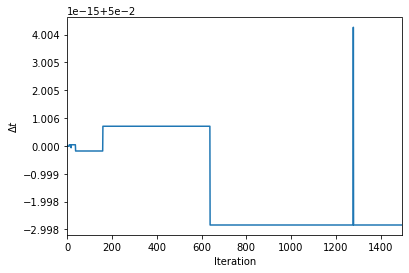

In [9]:
dt = times-np.roll(times,1)
dt = dt[2:-2]
plt.figure()
plt.plot(dt)
plt.xlim(0,len(dt))
plt.ylabel("$\Delta t$")
plt.xlabel("Iteration")
plt.show()

In [5]:
np.save("data/withoutNoise/data.npy",data)
np.save("data/withoutNoise/times.npy",times)

# Multiplicative Noise

Noise error -  0.018553554333156086
Noise error -  -0.0012492453763917055
Best decay constant: 1.913089067868665  Error:  0.0012492453763917055
Noise error -  0.020706904388207548
Noise error -  -0.0011148820285842298
Best decay constant: 1.9175997506196967  Error:  0.0011148820285842298


100%|██████████| 1500/1500 [00:33<00:00, 45.27it/s]


(1501, 128, 128)


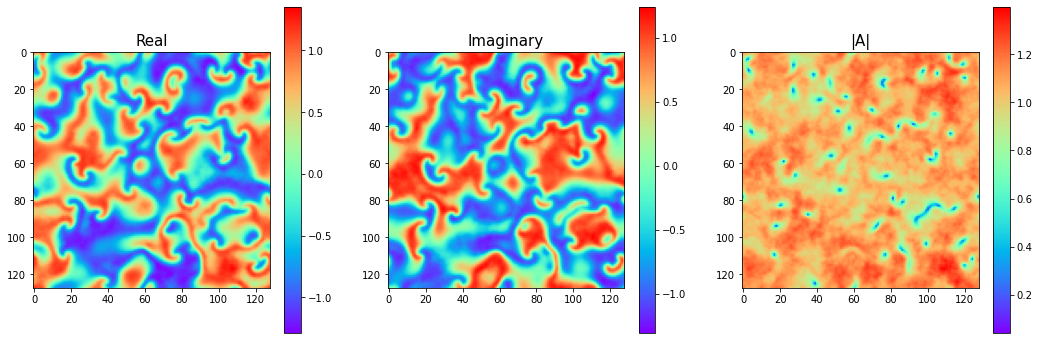

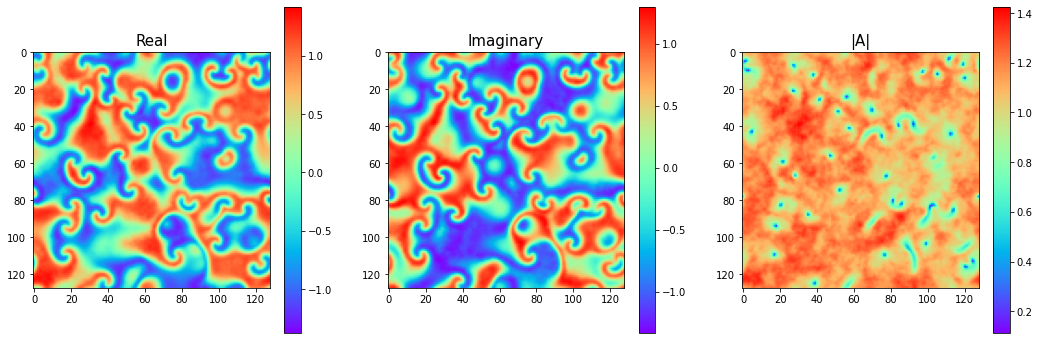

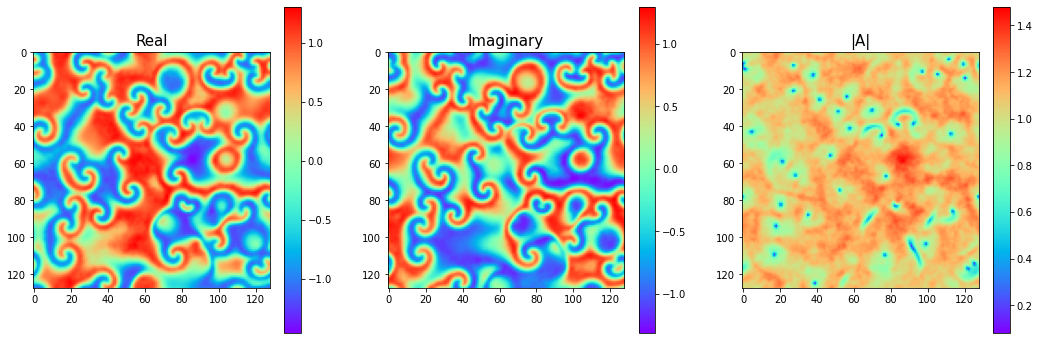

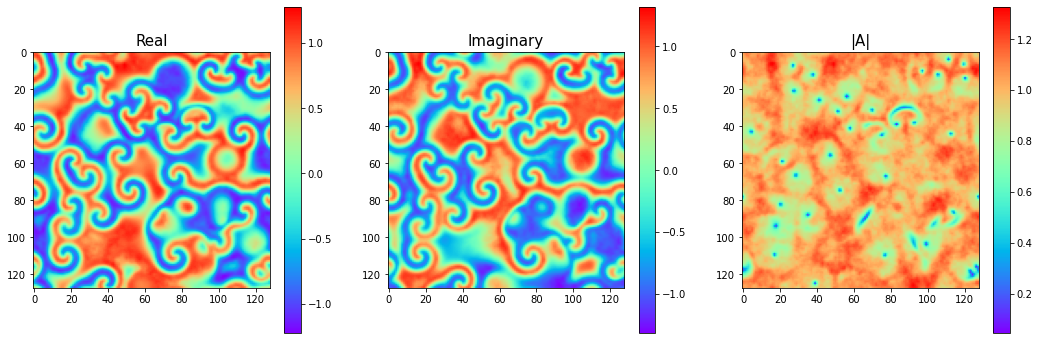

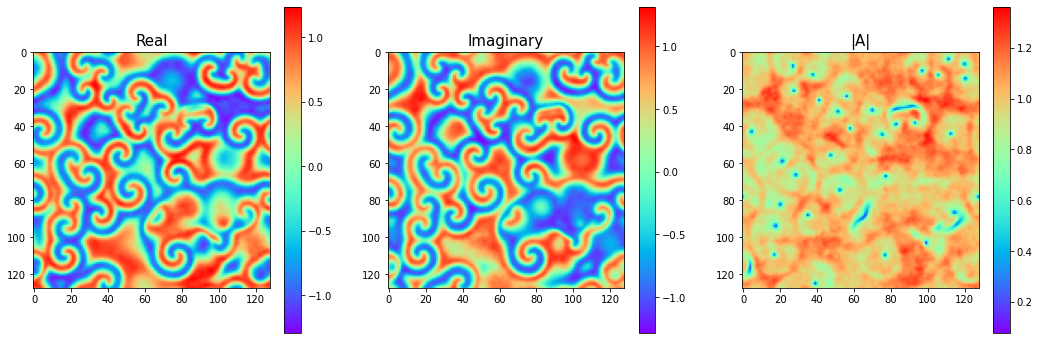

In [10]:
gl = NCGL(c1=0.0, c2=1.5, sigma_r=100.0,noiseArgs={"beta":2},noiseType='multiplicative',msize=128)
data,times = gl.solveRKF45(dt=0.05,ntimes=1500,stepsave=np.arange(2500))
print(data.shape)

plotSnap = [500,700,900,1100,1300]

for i in plotSnap:
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.title("Real",fontsize=15)
    plt.imshow(np.real(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.title("Imaginary",fontsize=15)
    plt.imshow(np.imag(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.title("|A|",fontsize=15)
    plt.imshow(np.abs(data[i]),cmap='rainbow')
    plt.colorbar()

plt.show()

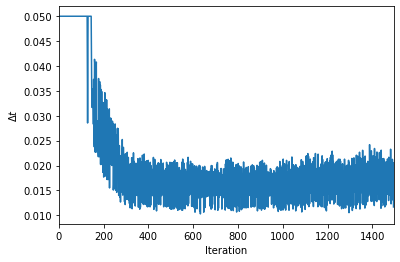

In [11]:
dt = times-np.roll(times,1)
dt = dt[2:-2]
plt.figure()
plt.plot(dt)
plt.xlim(0,len(dt))
plt.ylabel("$\Delta t$")
plt.xlabel("Iteration")
plt.show()

In [12]:
np.save("data/multiplicativeNoise/data.npy",data)
np.save("data/multiplicativeNoise/times.npy",times)

# Additive Noise

Noise error -  0.012307951591942645
Noise error -  -0.0005190592576638231
Best decay constant: 1.896711332061433  Error:  0.0005190592576638231
Noise error -  0.01045652149511267
Noise error -  -0.0004911760001666821
Best decay constant: 1.9233307314449342  Error:  0.0004911760001666821


100%|██████████| 1500/1500 [00:34<00:00, 43.05it/s]


(1501, 128, 128)


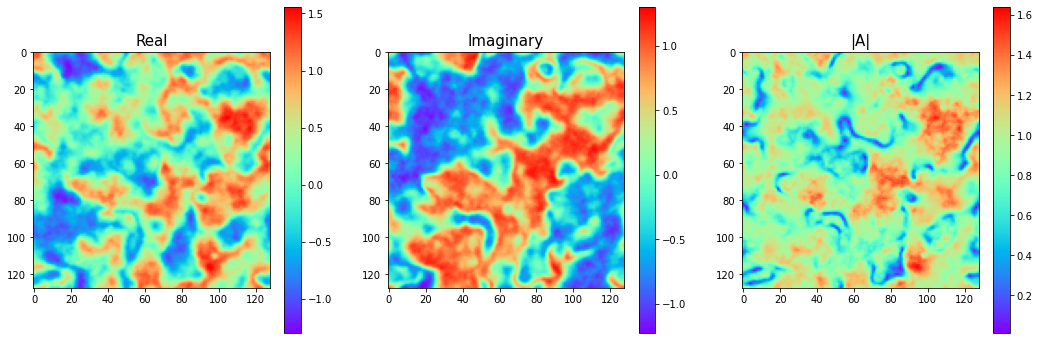

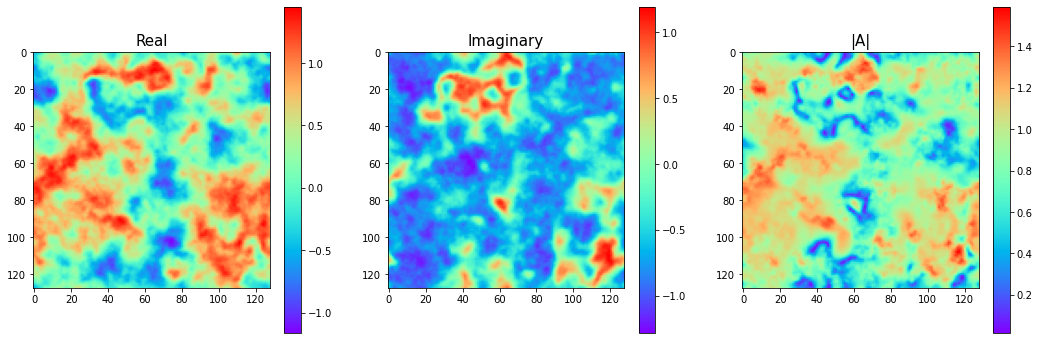

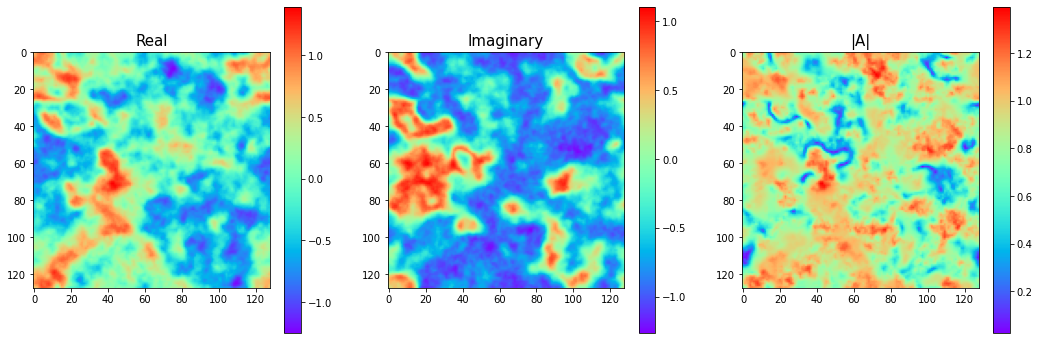

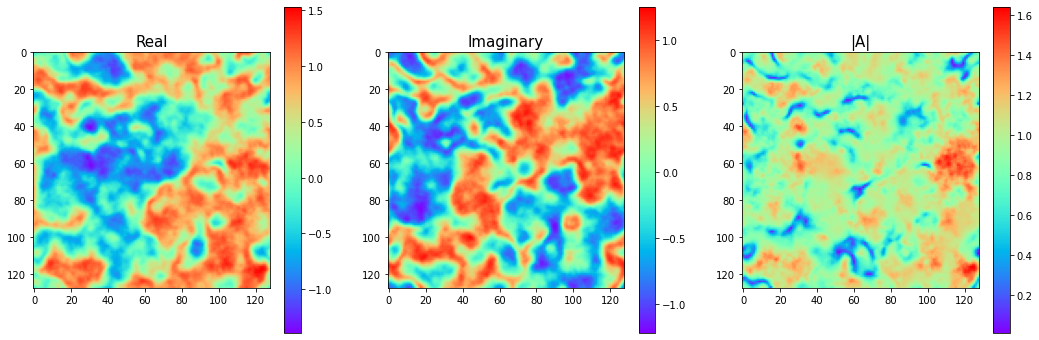

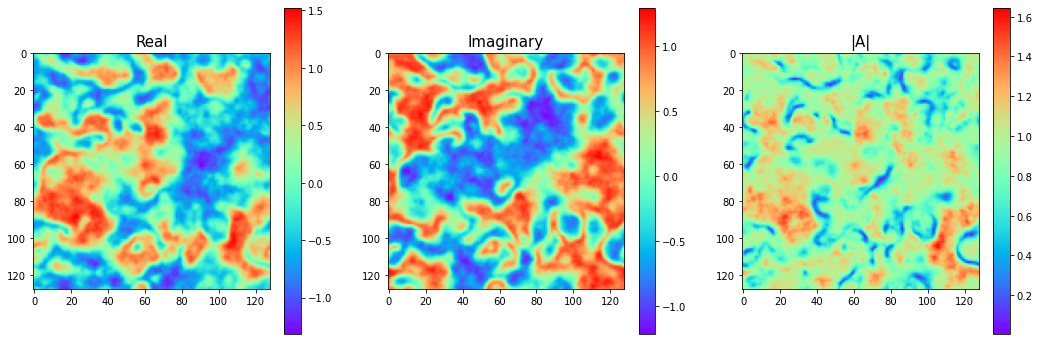

In [13]:
gl = NCGL(c1=0.0, c2=1.5, sigma_r=100.0,noiseArgs={"beta":2},noiseType='additive',msize=128)
data,times = gl.solveRKF45(dt=0.05,ntimes=1500,stepsave=np.arange(2500))
print(data.shape)

plotSnap = [500,700,900,1100,1300]

for i in plotSnap:
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.title("Real",fontsize=15)
    plt.imshow(np.real(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.title("Imaginary",fontsize=15)
    plt.imshow(np.imag(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.title("|A|",fontsize=15)
    plt.imshow(np.abs(data[i]),cmap='rainbow')
    plt.colorbar()

plt.show()

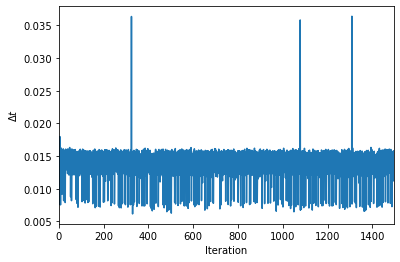

In [14]:
dt = times-np.roll(times,1)
dt = dt[2:-2]
plt.figure()
plt.plot(dt)
plt.xlim(0,len(dt))
plt.ylabel("$\Delta t$")
plt.xlabel("Iteration")
plt.show()

In [15]:
np.save("data/additiveNoise/data.npy",data)
np.save("data/additiveNoise/times.npy",times)

# Diffusive Noise

Noise error -  0.01035055660076667
Noise error -  -0.0005762809391152146
Best decay constant: 1.9321575845813734  Error:  0.0005762809391152146


100%|██████████| 1500/1500 [00:32<00:00, 46.57it/s]


(1501, 128, 128)


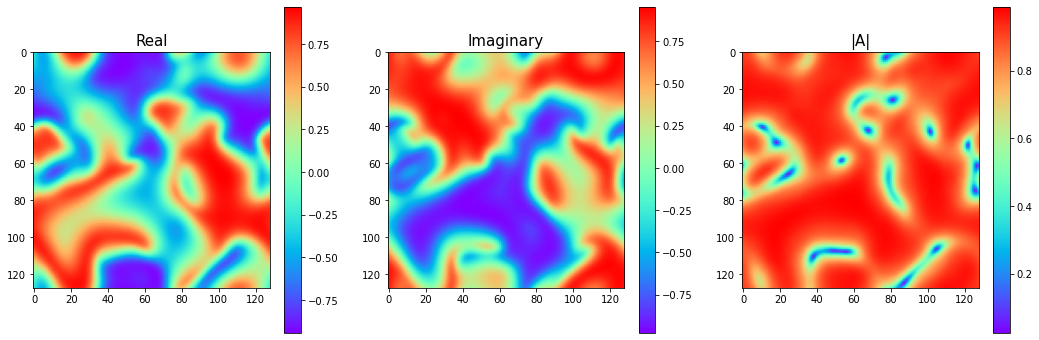

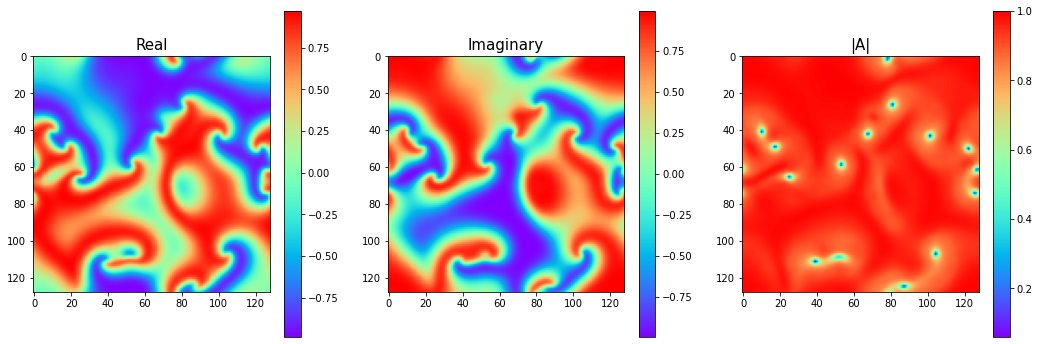

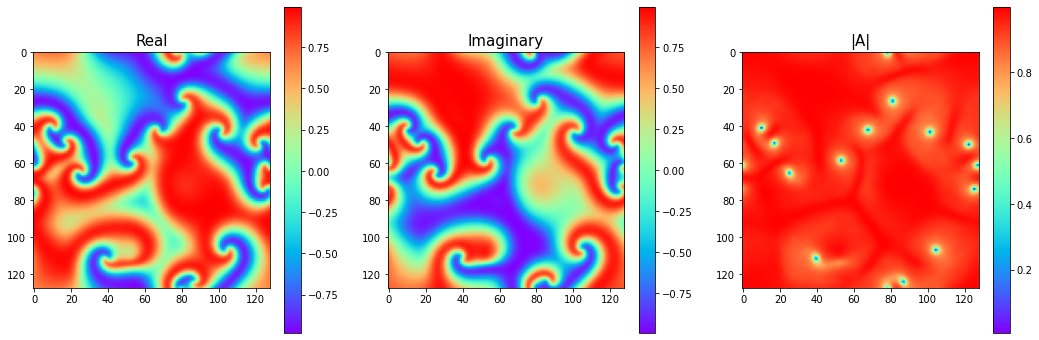

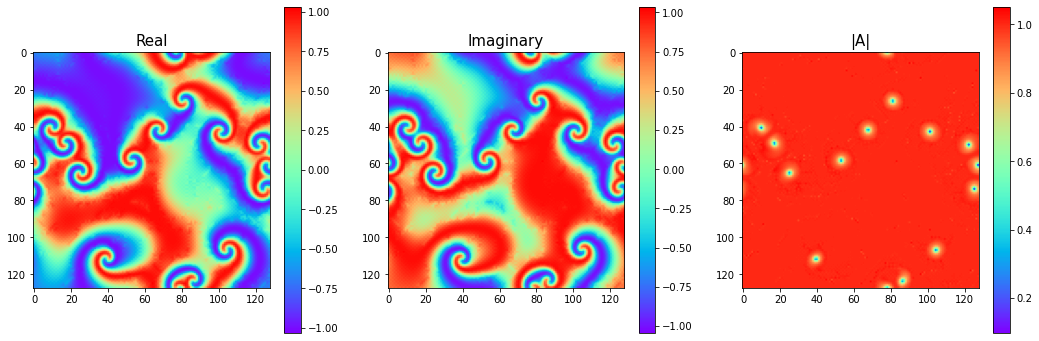

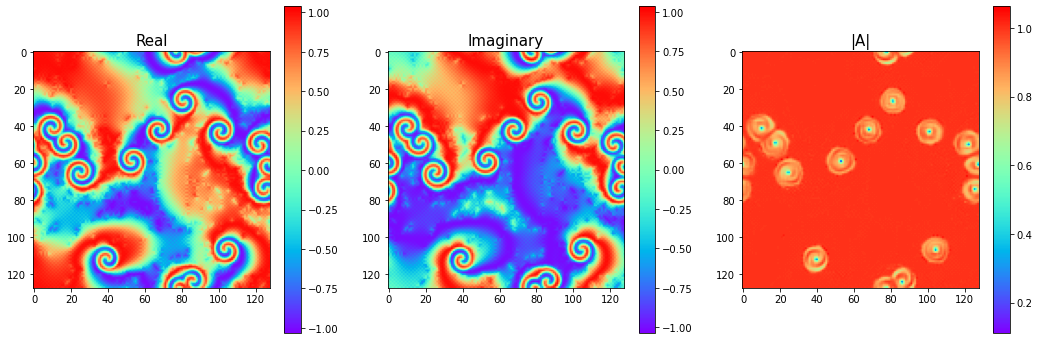

In [4]:
gl = NCGL(c1=0.0, c2=1.5, sigma_r=1.0,noiseArgs={"beta":2},noiseType='diffusive',msize=128)
data,times = gl.solveRKF45(dt=0.05,ntimes=1500,stepsave=np.arange(2500))
print(data.shape)

plotSnap = [500,700,900,1100,1300]

for i in plotSnap:
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.title("Real",fontsize=15)
    plt.imshow(np.real(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,2)
    plt.title("Imaginary",fontsize=15)
    plt.imshow(np.imag(data[i]),cmap='rainbow')
    plt.colorbar()
    plt.subplot(1,3,3)
    plt.title("|A|",fontsize=15)
    plt.imshow(np.abs(data[i]),cmap='rainbow')
    plt.colorbar()

plt.show()

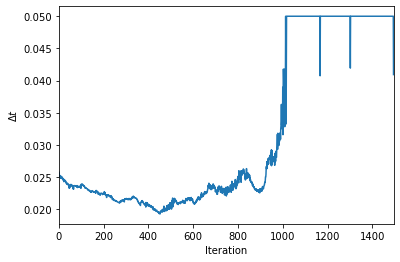

In [5]:
dt = times-np.roll(times,1)
dt = dt[2:-2]
plt.figure()
plt.plot(dt)
plt.xlim(0,len(dt))
plt.ylabel("$\Delta t$")
plt.xlabel("Iteration")
plt.show()

In [6]:
np.save("data/diffusiveNoise/data.npy",data)
np.save("data/diffusiveNoise/times.npy",times)